## Aprendizagem Supervisionada - Regressão

<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">

# Carregando a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pasta_raiz = '/content/drive/MyDrive/MBA - Big Data /Inteligência Artificial/Supervisionado/Regressão/Projeto'

In [ ]:
df_orders = pd.read_csv(f'{pasta_raiz}/orders.csv', parse_dates=['order_timestamp_local'])
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11 13:22:06.497000+00:00,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06 17:57:17.967000+00:00,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11 20:42:32.058000+00:00,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


# Criação da ABT (10 pontos)


### Agregando receita por dia

**(1.5 ponto) `Q1`** Crie um DataFrame chamado `df` que deverá somar o valor total dos pedidos. Utilize a variável `order_timestamp_local` para recuperar a data. Faça o agrupamento por dia e por fim faça a ordenação do menor para o maior.

O resultado esperado é um DataFrame com duas colunas (`order_date` e `receita`). 

| order_date 	| receita   	|
|-----------:	|-----------	|
| 2019-06-01 	| 209061.01 	|
| 2019-06-02 	| 213995.65 	|
| 2019-06-03 	| 108973.96 	|


In [ ]:
df = (
    df_orders
    .assign(order_date = df_orders['order_timestamp_local'].dt.date)
    .groupby('order_date')
    .agg(receita = ('order_total', 'sum'))
    .sort_values('order_date')
    .reset_index()
)

df.head(4)

,order_date,receita
0,2019-06-01,209061.01
1,2019-06-02,213995.65
2,2019-06-03,108973.96
3,2019-06-04,106973.23


**(0.5 ponto) `Q1.1`** Faça um plot da série temporal. Utilize o método `.plot()`. 

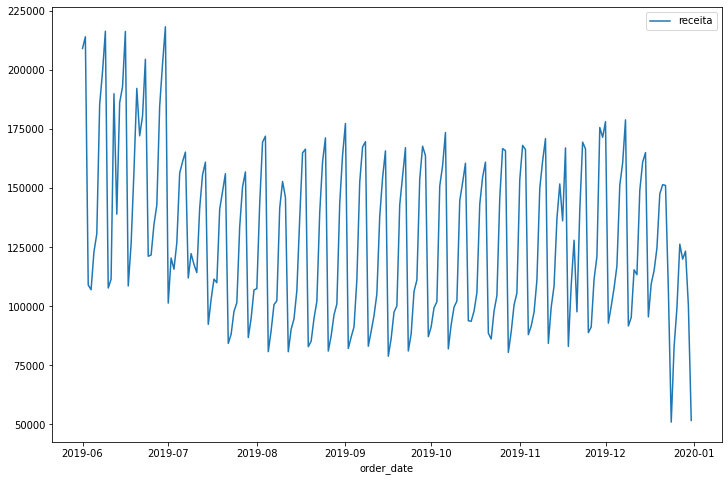

In [ ]:
df.plot('order_date', 'receita', figsize=(12,8))

### Train-Test Split

**(2.0 ponto) `Q2`** Crie dois dataframes: `df_train` com dados de junho até novembro e `df_test` com dados de dezembro.

In [ ]:
df.dtypes

order_date     object
receita       float64
dtype: object

In [ ]:
df.agg({'order_date': ['min', 'max']})

,order_date
min,2019-06-01
max,2019-12-31


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
df.dtypes

order_date    datetime64[ns]
receita              float64
dtype: object

In [ ]:
df_train = df.query('order_date < "2019-12-01"')
df_test = df.query('order_date >= "2019-12-01"')

In [ ]:
print('Quantidade de linhas df_train: {}'.format(df_train.shape[0]))
print('Quantidade de linhas df_test: {}'.format(df_test.shape[0]))

Quantidade de linhas df_train: 183
Quantidade de linhas df_test: 31


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - A resposta do exercício deverá ser:

`df_train` deverá ter 183 linhas e `df_test` deverá ter 31 linhas.

### Feature Engineering

#### Variáveis Sazonais

**(2.0 ponto) `Q3`** Crie as seguintes variáveis sazonais para ambos os DataFrames `df_train` e `df_test`:
- `mes`: mês
- `dia`: dia do mês
- `weekday`: dia da semana
- `dayofyear`: dia do ano

In [ ]:
df_train = (
    df_train
    .assign(mes = df_train['order_date'].dt.month,
            dia = df_train['order_date'].dt.day,
            weekday = df_train['order_date'].dt.weekday,
            dayofyear = df_train['order_date'].dt.dayofyear)
)

df_test = (
    df_test
    .assign(mes = df_test['order_date'].dt.month,
            dia = df_test['order_date'].dt.day,
            weekday = df_test['order_date'].dt.weekday,
            dayofyear = df_test['order_date'].dt.dayofyear)
)

print('Dataset Treino:\n\n{}'.format(df_train.head()))
print('\n')
print('Dataset Teste:\n\n{}'.format(df_test.head()))

Dataset Treino:

  order_date    receita  mes  dia  weekday  dayofyear
0 2019-06-01  209061.01    6    1        5        152
1 2019-06-02  213995.65    6    2        6        153
2 2019-06-03  108973.96    6    3        0        154
3 2019-06-04  106973.23    6    4        1        155
4 2019-06-05  122957.05    6    5        2        156


Dataset Teste:

    order_date    receita  mes  dia  weekday  dayofyear
183 2019-12-01  178085.12   12    1        6        335
184 2019-12-02   92833.10   12    2        0        336
185 2019-12-03   99995.42   12    3        1        337
186 2019-12-04  107698.24   12    4        2        338
187 2019-12-05  117057.18   12    5        3        339


#### Variáveis Lag

**(2.0 ponto) `Q4`** Crie as seguintes variáveis de lag para ambos os DataFrames `df_train` e `df_test`:

- `receita_atual`: receita do dia em que a previsão é feita
- `receita_anterior`: receita do dia anterior ao dia em que a previsão é feita
- `diff_receitas`: diferença de receita do dia atual para o dia anterior

Utilize o método `.shift()` da coluna `df['receita']`.  O método `shift()` é utilizada para deslocar o índice pelo número desejado de períodos com uma frequencia de tempo opcional.




In [ ]:
# Antes de testar o comando .shift(n)
df['receita'][:4]

0    209061.01
1    213995.65
2    108973.96
3    106973.23
Name: receita, dtype: float64

In [ ]:
# Depois de testar o comando .shift(1)
df['receita'][:4].shift(1)

0          NaN
1    209061.01
2    213995.65
3    108973.96
Name: receita, dtype: float64

In [ ]:
# Depois de testar o comando .shift(2)
df['receita'][:4].shift(2)

0          NaN
1          NaN
2    209061.01
3    213995.65
Name: receita, dtype: float64

In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train = (
    df_train
    .assign(receita_atual = df_train['receita'].shift(1),
            receita_anterior = df_train['receita'].shift(2),
            diff_receitas = lambda df: df['receita_atual'] - df['receita_anterior'])
    .filter(['order_date', 'mes', 'dia', 'weekday', 'dayofyear', 'receita', 'receita_atual', 'receita_anterior', 'diff_receitas'])
)

df_train.head(4)

,order_date,mes,dia,weekday,dayofyear,receita,receita_atual,receita_anterior,diff_receitas
0,2019-06-01,6,1,5,152,209061.01,NaN,NaN,NaN
1,2019-06-02,6,2,6,153,213995.65,209061.01,NaN,NaN
2,2019-06-03,6,3,0,154,108973.96,213995.65,209061.01,4934.64
3,2019-06-04,6,4,1,155,106973.23,108973.96,213995.65,-105021.69


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test = (
    df_test
    .assign(receita_atual = df_test['receita'].shift(1),
            receita_anterior = df_test['receita'].shift(2),
            diff_receitas = lambda df: df['receita_atual'] - df['receita_anterior'])
    .filter(['order_date', 'mes', 'dia', 'weekday', 'dayofyear', 'receita', 'receita_atual', 'receita_anterior', 'diff_receitas'])
)

df_test.head(4)

,order_date,mes,dia,weekday,dayofyear,receita,receita_atual,receita_anterior,diff_receitas
183,2019-12-01,12,1,6,335,178085.12,NaN,NaN,NaN
184,2019-12-02,12,2,0,336,92833.10,178085.12,NaN,NaN
185,2019-12-03,12,3,1,337,99995.42,92833.10,178085.12,-85252.02
186,2019-12-04,12,4,2,338,107698.24,99995.42,92833.10,7162.32


#### Média Móvel dos últimos 3 dias

**(2.0 ponto) `Q5`** Cria uma variável que representa a média móvel dos últimos 3 dias anteriores ao dia de previsão para ambos os DataFrames `df_train` e `df_test`.

- `media_movel`: média móvel dos últimos 3 dias.

Utilize o método `.rolling(3)` que possibilita realizar cálculos para uma determinada janela deslizante. O valor 3, significa o tamanho da janela que será utilizada para deslizar.


In [ ]:
df_train['receita_atual'][:9]

0          NaN
1    209061.01
2    213995.65
3    108973.96
4    106973.23
5    122957.05
6    130615.30
7    185314.25
8    199144.33
Name: receita_atual, dtype: float64

In [ ]:
df_train['receita_atual'][:9].rolling(3).mean()

0              NaN
1              NaN
2              NaN
3    177343.540000
4    143314.280000
5    112968.080000
6    120181.860000
7    146295.533333
8    171691.293333
Name: receita_atual, dtype: float64

In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train = (
    df_train
    .assign(media_movel = df_train['receita_atual'].rolling(3).mean())
)

df_train.head(4)

,order_date,mes,dia,weekday,dayofyear,receita,receita_atual,receita_anterior,diff_receitas,media_movel
0,2019-06-01,6,1,5,152,209061.01,NaN,NaN,NaN,NaN
1,2019-06-02,6,2,6,153,213995.65,209061.01,NaN,NaN,NaN
2,2019-06-03,6,3,0,154,108973.96,213995.65,209061.01,4934.64,NaN
3,2019-06-04,6,4,1,155,106973.23,108973.96,213995.65,-105021.69,177343.54


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test = (
    df_test
    .assign(media_movel = df_test['receita_atual'].rolling(3).mean())
)

df_test.head(4)

,order_date,mes,dia,weekday,dayofyear,receita,receita_atual,receita_anterior,diff_receitas,media_movel
183,2019-12-01,12,1,6,335,178085.12,NaN,NaN,NaN,NaN
184,2019-12-02,12,2,0,336,92833.10,178085.12,NaN,NaN,NaN
185,2019-12-03,12,3,1,337,99995.42,92833.10,178085.12,-85252.02,NaN
186,2019-12-04,12,4,2,338,107698.24,99995.42,92833.10,7162.32,123637.88


# Modelagem (10 pontos)

Iremos testar diferentes algoritmos de regressão para o problema em questão.

## Criando os conjuntos de treino e teste

**(1.0 ponto) `Q6`** Crie os seguintes dataframes selecionando apenas as colunas `['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']` como **features** e a coluna `receita` como **target**. Remova todas as linhas com valores faltantes.

- `X_train`
- `X_test`
- `y_train`
- `y_test`

In [ ]:
features = ['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']
target   = 'receita'

Remova os valores faltantes `.dropna()` existentes que foram criados na parte de Feature Engineering e faça a filtragem correspondente utilizando as variáveis `features` e `target`.

In [ ]:
df_train = df_train.dropna(axis='index').reset_index(drop=True)

X_train = df_train.filter(features)
y_train = df_train[target]


df_test = df_test.dropna(axis= 'index').reset_index(drop= True)

X_test = df_test.filter(features)
y_test = df_test[target]

In [ ]:
print('Shape X_train: {}'.format(X_train.shape))
print('Shape y_train: {}'.format(y_train.shape))

print('\n')

print('Shape X_test: {}'.format(X_test.shape))
print('Shape y_test: {}'.format(y_test.shape))

Shape X_train: (180, 8)
Shape y_train: (180,)


Shape X_test: (28, 8)
Shape y_test: (28,)


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - Verifique a quantidade de linhas e colunas para as variáveis `X_train`, `X_test`, `y_train` e `y_test`:

    X_train - (180, 8) 
    y_train - (180,)

    X_test - (28, 8)
    y_test - (28,)


## Regressão Linear

**(0.5 ponto) `Q7`** Treine uma regressão linear para o conjunto de treino e salve na variável `lr_model`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

Utilize o `StandardScaler` para normalizar as variáveis. Utilize a classe `SklearnTransformerWrapper` da biblioteca `feature_engine`.

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.2 MB/s 


In [ ]:
from sklearn.linear_model         import LinearRegression
from sklearn.preprocessing        import StandardScaler
from feature_engine.wrappers      import SklearnTransformerWrapper
from feature_engine.imputation    import ArbitraryNumberImputer
from sklearn.pipeline             import Pipeline

######################################################
# Adicione o código da Regressão Linear via Pipeline #
######################################################

lr_model = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999,variables=features)),
    ("scaler",SklearnTransformerWrapper(transformer=StandardScaler(),variables=features)),
    ("lr",LinearRegression())
])

In [ ]:
# Execute para criar o modelo
lr_model.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['mes', 'dia', 'weekday',
                                                   'dayofyear', 'receita_atual',
                                                   'receita_anterior',
                                                   'diff_receitas',
                                                   'media_movel'])),
                ('scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['mes', 'dia', 'weekday',
                                                      'dayofyear',
                                                      'receita_atual',
                                                      'receita_anterior',
                                                      'diff_receitas',
                                                      'media_movel'])),
  

## Criando Função que retorna todas as Métricas

**(1.0 ponto) `Q8`** Crie uma função chamada `log_results` que deverá retornar um DataFrame com todas as métricas de regressão. A função deverá conter os seguintes parâmetros:

- `modelo_objeto` esse parâmetro é obrigatório e tem que ser a variável que representa o objeto do modelo já "fitado".
- `nome_modelo` deverá ser o nome do modelo
- `X_train, X_test, y_train, y_test` são os parâmetros referentes aos conjuntos de treino e teste que serão avaliados.

Lembre-se de criar funções auxiliares para facilitar a criação das métricas.

Exemplo de chamada da função:

    lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)


A saída da função para a regressão linear deverá ser a seguinte:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>modelo</th>
      <th>modo</th>
      <th>r2</th>
      <th>r2_ajustado</th>
      <th>mse</th>
      <th>rmse</th>
      <th>rmsle</th>
      <th>mae</th>
      <th>medae</th>
      <th>mape</th>
      <th>max_error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Regressão Linear</td>
      <td>treino</td>
      <td>0.8518</td>
      <td>0.8449</td>
      <td>184683302.0703</td>
      <td>13589.8235</td>
      <td>0.1024</td>
      <td>10438.1981</td>
      <td>8183.7347</td>
      <td>0.0814</td>
      <td>57688.0425</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Regressão Linear</td>
      <td>teste</td>
      <td>0.5458</td>
      <td>0.3545</td>
      <td>447617025.0598</td>
      <td>21156.9616</td>
      <td>0.2217</td>
      <td>18787.5085</td>
      <td>16495.3045</td>
      <td>0.1762</td>
      <td>38496.7851</td>
    </tr>
  </tbody>
</table>

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    # crie aqui o código da sua função

    y_pred_train = modelo_objeto.predict(X_train)
    y_pred_test = modelo_objeto.predict(X_test)

    df_results = pd.DataFrame(columns=['modelo', 'model', 'r2', 'r2_ajustado', 'mse', 'rmse', 'rmsle', 'mae', 'medae', 'mape', 'max_error'])

    df_results.loc[0] = [
                          nome_modelo, 
                          'treino',
                          r2_score(y_train, y_pred_train),
                          adjusted_r2(y_train, y_pred_train, X_train),
                          mean_squared_error(y_train, y_pred_train),
                          mean_squared_error(y_train, y_pred_train, squared= False),
                          mean_squared_log_error(y_train, y_pred_train, squared= False),
                          mean_absolute_error(y_train, y_pred_train),
                          median_absolute_error(y_train, y_pred_train),
                          mean_absolute_percentage_error(y_train, y_pred_train),
                          max_error(y_train, y_pred_train)
    ]

    df_results.loc[1] = [
                          nome_modelo, 
                          'teste',
                          r2_score(y_test, y_pred_test),
                          adjusted_r2(y_test, y_pred_test, X_test),
                          mean_squared_error(y_test, y_pred_test),
                          mean_squared_error(y_test, y_pred_test, squared= False),
                          mean_squared_log_error(y_test, y_pred_test, squared= False),
                          mean_absolute_error(y_test, y_pred_test),
                          median_absolute_error(y_test, y_pred_test),
                          mean_absolute_percentage_error(y_test, y_pred_test),
                          max_error(y_test, y_pred_test)
    ]

    return df_results

#### Outra forma

In [ ]:
# def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
#     # crie aqui o código da sua função

#     y_pred_train = modelo_objeto.predict(X_train)
#     y_pred_test = modelo_objeto.predict(X_test)

#     # criando um dicionário irá conter os resultados dos modelos
#     dicionario_resultados = {'modelo': [], 'modo': [], 'r2': [], 'r2_ajustado': [], 'mse': [], 'rmse': [], 
#                              'rmsle': [], 'mae': [], 'medae': [], 'mape': [], 'max_error': []}
    
#     # populando a tabela com os resultados - TREINO
#     dicionario_resultados['modelo'].append(nome_modelo)
#     dicionario_resultados['modo'].append('treino')
#     dicionario_resultados['r2'].append(r2_score(y_train, y_pred_train))
#     dicionario_resultados['r2_ajustado'].append(adjusted_r2(y_train, y_pred_train, X_train))
#     dicionario_resultados['mse'].append(mean_squared_error(y_train, y_pred_train))
#     dicionario_resultados['rmse'].append(mean_squared_error(y_train, y_pred_train, squared= False))
#     dicionario_resultados['rmsle'].append(mean_squared_log_error(y_train, y_pred_train, squared= False))
#     dicionario_resultados['mae'].append(mean_absolute_error(y_train, y_pred_train))
#     dicionario_resultados['medae'].append(median_absolute_error(y_train, y_pred_train))
#     dicionario_resultados['mape'].append(mean_absolute_percentage_error(y_train, y_pred_train))
#     dicionario_resultados['max_error'].append(max_error(y_train, y_pred_train))

#     # populando a tabela com os resultados - TESTE
#     dicionario_resultados['modelo'].append(nome_modelo)
#     dicionario_resultados['modo'].append('teste')
#     dicionario_resultados['r2'].append(r2_score(y_test, y_pred_test))
#     dicionario_resultados['r2_ajustado'].append(adjusted_r2(y_test, y_pred_test, X_test))
#     dicionario_resultados['mse'].append(mean_squared_error(y_test, y_pred_test))
#     dicionario_resultados['rmse'].append(mean_squared_error(y_test, y_pred_test, squared= False))
#     dicionario_resultados['rmsle'].append(mean_squared_log_error(y_test, y_pred_test, squared= False))
#     dicionario_resultados['mae'].append(mean_absolute_error(y_test, y_pred_test))
#     dicionario_resultados['medae'].append(median_absolute_error(y_test, y_pred_test))
#     dicionario_resultados['mape'].append(mean_absolute_percentage_error(y_test, y_pred_test))
#     dicionario_resultados['max_error'].append(max_error(y_test, y_pred_test))

#     df_restultados = pd.DataFrame.from_dict(dicionario_resultados)

#     return df_restultados

### Aplicando a função

**(0.5 ponto) `Q8.1`** Aplique a função desenvolvida anteriormente para o modelo `lr_model` criado no exercício `Q7`. Salve o retorno da função na variável `lr_results`.

In [ ]:
pd.options.display.float_format='{:.4f}'.format
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)

lr_results

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,Regressão Linear,treino,0.8518,0.8449,184683302.0703,13589.8235,0.1024,10438.1981,8183.7347,0.0814,57688.0425
1,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851


## Ridge Regression

**(1.0 ponto) `Q9`** Treine uma [Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer) (Regressão Linear menos susceptível ao overfitting) para o conjunto de treino e salve na variável `ridge_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `ridge_results`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[
                              ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999,variables=features)),
                              ('scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=features)),
                              ('model', Ridge())
              ])

# continue o código abaixo
ridge_model.fit(X_train, y_train)
ridge_results = log_results(ridge_model, 'Ridge Regression', X_train, X_test, y_train, y_test)

ridge_results

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,Ridge Regression,treino,0.8420,0.8346,196989965.3840,14035.3114,0.1026,10672.7649,8595.2779,0.0819,61691.8485
1,Ridge Regression,teste,0.6553,0.5102,339686747.4264,18430.5927,0.1958,15391.8553,12434.6155,0.1541,38550.1485


## Decision Tree

**(1.0 ponto) `Q10`**  Treine uma Decision Tree para o conjunto de treino e salve na variável `tree_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `tree_results`. 

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
data_tree_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=features)),
])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = Pipeline(data_tree_pipe.steps + [('decision_tree', DecisionTreeRegressor(random_state=30, max_depth=3))])

tree_model.fit(X_train, y_train)
tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)

tree_results

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,Decision Tree,treino,0.9237,0.9202,95070777.7824,9750.4245,0.0737,6746.0072,4908.5190,0.0532,48890.9530
1,Decision Tree,teste,0.6025,0.4351,391733754.2567,19792.2650,0.2104,14953.6309,11020.4228,0.1612,52571.6967


## Random Forest

**(1.0 ponto) `Q11`** Treine uma Random Forest para o conjunto de treino e salve na variável `rf_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `rf_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(data_tree_pipe.steps + [('random_forest', RandomForestRegressor(random_state=30, max_depth=3))])

rf_model.fit(X_train, y_train)
rf_results = log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

rf_results

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,Random Forest,treino,0.9372,0.9343,78288006.4591,8848.0510,0.0676,6261.5504,5111.0617,0.0499,48377.4788
1,Random Forest,teste,0.6497,0.5022,345215267.3708,18579.9695,0.2025,13758.3794,10473.3440,0.1513,47754.2742


## LGBM

**(1.0 ponto) `Q12`** Treine um LighGBM para o conjunto de treino e salve na variável `lgbm_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `lgbm_results`.

Utilize os parâmetros `random_state=30`

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = Pipeline(data_tree_pipe.steps + [('lgbm', LGBMRegressor(random_state=30))])

lgbm_model.fit(X_train, y_train)
lgbm_results = log_results(lgbm_model, 'LighGBM', X_train, X_test, y_train, y_test)

lgbm_results

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,LighGBM,treino,0.9724,0.9711,34355297.9714,5861.3393,0.0419,3840.3882,2335.8202,0.0296,31048.0802
1,LighGBM,teste,0.6758,0.5393,319482819.9631,17874.0824,0.2012,12159.9939,6421.4305,0.1401,48337.9814



**(1.0 ponto) `Q13`** Treine um XGBoost para o conjunto de treino e salve na variável `xgb_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `xgb_results`.

Utilize os parâmetros `random_state=30`



In [ ]:
from xgboost import XGBRegressor

xgb_model = Pipeline(data_tree_pipe.steps + [('xgb', XGBRegressor(random_state=30))])

xgb_model.fit(X_train, y_train)
xgb_results = log_results(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test)

xgb_results

[19:52:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,XGBoost,treino,0.9880,0.9875,14920027.9569,3862.6452,0.0296,2791.0446,2037.9273,0.0220,16954.8050
1,XGBoost,teste,0.5173,0.3140,475709696.1073,21810.7702,0.2316,15371.5294,9879.5217,0.1742,55779.2288


## CatBoost

**(1.0 ponto) `Q14`** Treine um CatBoost para o conjunto de treino e salve na variável `cat_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `cat_results`.

Utilize os parâmetros `random_state=30`

PS: não esqueça de executar a linha para instalar a biblioteca `catboost`.

In [ ]:
!pip install catboost==0.25.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 18 kB/s 


In [ ]:
from catboost import CatBoostRegressor

cat_model = Pipeline(data_tree_pipe.steps + [('catboost', CatBoostRegressor(random_state=30))])

cat_model.fit(X_train, y_train)
cat_results = log_results(cat_model, 'CatBoost', X_train, X_test, y_train, y_test)

cat_results

Learning rate set to 0.028763
0:	learn: 34562.4926932	total: 48.2ms	remaining: 48.1s
1:	learn: 34037.0082301	total: 49.4ms	remaining: 24.7s
2:	learn: 33377.3096763	total: 51.3ms	remaining: 17.1s
3:	learn: 32787.4715584	total: 52.9ms	remaining: 13.2s
4:	learn: 32148.8641297	total: 54.5ms	remaining: 10.9s
5:	learn: 31591.4462022	total: 56.1ms	remaining: 9.3s
6:	learn: 31130.6405119	total: 57.6ms	remaining: 8.18s
7:	learn: 30534.1115904	total: 59.3ms	remaining: 7.35s
8:	learn: 29976.7288115	total: 60.8ms	remaining: 6.7s
9:	learn: 29398.5790885	total: 62.3ms	remaining: 6.17s
10:	learn: 28862.3723273	total: 63.8ms	remaining: 5.74s
11:	learn: 28355.1041543	total: 65.3ms	remaining: 5.38s
12:	learn: 27828.2913495	total: 66.8ms	remaining: 5.07s
13:	learn: 27315.5620659	total: 68.7ms	remaining: 4.84s
14:	learn: 26824.7410509	total: 70.3ms	remaining: 4.61s
15:	learn: 26368.7271883	total: 71.8ms	remaining: 4.42s
16:	learn: 25911.4417675	total: 73.5ms	remaining: 4.25s
17:	learn: 25492.3172232	total

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,CatBoost,treino,0.9992,0.9991,1045179.7029,1022.3403,0.0083,813.3584,672.5766,0.0066,3094.8139
1,CatBoost,teste,0.4278,0.1869,563852411.6851,23745.5767,0.2474,17455.2397,13120.2484,0.1955,61458.2479


## Juntando todos os resultados

**(0.5 ponto) `Q15`** Consolide todos os resultados acima em uma única tabela. Dica: use a função `pd.concat()`.

In [ ]:
compare_models = pd.concat([lr_results, ridge_results, tree_results, rf_results, lgbm_results, xgb_results, cat_results]).reset_index(drop=True)
compare_models

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,Regressão Linear,treino,0.8518,0.8449,184683302.0703,13589.8235,0.1024,10438.1981,8183.7347,0.0814,57688.0425
1,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851
2,Ridge Regression,treino,0.8420,0.8346,196989965.3840,14035.3114,0.1026,10672.7649,8595.2779,0.0819,61691.8485
3,Ridge Regression,teste,0.6553,0.5102,339686747.4264,18430.5927,0.1958,15391.8553,12434.6155,0.1541,38550.1485
4,Decision Tree,treino,0.9237,0.9202,95070777.7824,9750.4245,0.0737,6746.0072,4908.5190,0.0532,48890.9530
5,Decision Tree,teste,0.6025,0.4351,391733754.2567,19792.2650,0.2104,14953.6309,11020.4228,0.1612,52571.6967
6,Random Forest,treino,0.9372,0.9343,78288006.4591,8848.0510,0.0676,6261.5504,5111.0617,0.0499,48377.4788
7,Random Forest,teste,0.6497,0.5022,345215267.3708,18579.9695,0.2025,13758.3794,10473.3440,0.1513,47754.2742
8,LighGBM,treino,0.9724,0.9711,34355297.9714,5861.3393,0.0419,3840.3882,2335.8202,0.0296,31048.0802
9,LighGBM,teste,0.6758,0.5393,319482819.9631,17874.0824,0.2012,12159.9939,6421.4305,0.1401,48337.9814


**(0.5 ponto) `Q16`** Qual o modelo que apresentou o melhor R2 ajustado na base de treino?

In [ ]:
compare_models.query('model == "treino"').sort_values('r2_ajustado', ascending= False).reset_index(drop= True)

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,CatBoost,treino,0.9992,0.9991,1045179.7029,1022.3403,0.0083,813.3584,672.5766,0.0066,3094.8139
1,XGBoost,treino,0.9880,0.9875,14920027.9569,3862.6452,0.0296,2791.0446,2037.9273,0.0220,16954.8050
2,LighGBM,treino,0.9724,0.9711,34355297.9714,5861.3393,0.0419,3840.3882,2335.8202,0.0296,31048.0802
3,Random Forest,treino,0.9372,0.9343,78288006.4591,8848.0510,0.0676,6261.5504,5111.0617,0.0499,48377.4788
4,Decision Tree,treino,0.9237,0.9202,95070777.7824,9750.4245,0.0737,6746.0072,4908.5190,0.0532,48890.9530
5,Regressão Linear,treino,0.8518,0.8449,184683302.0703,13589.8235,0.1024,10438.1981,8183.7347,0.0814,57688.0425
6,Ridge Regression,treino,0.8420,0.8346,196989965.3840,14035.3114,0.1026,10672.7649,8595.2779,0.0819,61691.8485


**(0.5 ponto) `Q17`** Qual o modelo que apresentou o melhor R2 ajustado na base de teste?

In [ ]:
compare_models.query('model == "teste"').sort_values('r2_ajustado', ascending= False).reset_index(drop= True)

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,LighGBM,teste,0.6758,0.5393,319482819.9631,17874.0824,0.2012,12159.9939,6421.4305,0.1401,48337.9814
1,Ridge Regression,teste,0.6553,0.5102,339686747.4264,18430.5927,0.1958,15391.8553,12434.6155,0.1541,38550.1485
2,Random Forest,teste,0.6497,0.5022,345215267.3708,18579.9695,0.2025,13758.3794,10473.3440,0.1513,47754.2742
3,Decision Tree,teste,0.6025,0.4351,391733754.2567,19792.2650,0.2104,14953.6309,11020.4228,0.1612,52571.6967
4,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851
5,XGBoost,teste,0.5173,0.3140,475709696.1073,21810.7702,0.2316,15371.5294,9879.5217,0.1742,55779.2288
6,CatBoost,teste,0.4278,0.1869,563852411.6851,23745.5767,0.2474,17455.2397,13120.2484,0.1955,61458.2479


**(0.5 ponto) `Q18`** Qual o modelo que devemos considerar para realizar as otimizações e por que?

**[RESPOSTA]** 

Quando comparamos os valores preditos pelos modelos nas bases de treino e de teste e olhamos para as métricas de avaliação de modelo. É possível concluir que o <font color='yellow'>melhor modelo para a base de treino segundo o r2_ajustado foi o CatBoost, enquanto que para a base de teste ele foi o pior.</font> 

Enquanto isso... o <font color='orange'>LGBM está scorado como um dos melhores modelos para a base de treino e o melhor modelo na base de teste, segundo a métrica do r2_ajustado.</font> 

Além disso foi possível observar uma piora na maioria dos valores preditos pelos modelos, desconsiderando alguns valores de "max_error" quando comparamos as métricas na base de treino e de teste. 

In [ ]:
models = ['LighGBM', 'Ridge Regression', 'Random Forest', 'Decision Tree', 'Regressão Linear', 'XGBoost', 'CatBoost']

cols = ['r2', 'r2_ajustado', 'mse', 'rmse', 'rmsle', 'mae', 'medae', 'mape', 'max_error']
new_cols = ['modelo', 'model', 'r2', 'r2_ajustado', 'mse', 'rmse', 'rmsle', 'mae', 'medae', 'mape', 'max_error']

diff_models = pd.DataFrame()

for i in models: 
  diff_models = diff_models.append(compare_models.query(f'modelo == "{i}"')[cols].diff(axis=0).assign(modelo= f'{i}').dropna())

diff_models.assign(model= 'teste - treino').reindex(columns= new_cols).reset_index(drop= True)

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,LighGBM,teste - treino,-0.2966,-0.4318,285127521.9917,12012.7431,0.1593,8319.6057,4085.6103,0.1105,17289.9012
1,Ridge Regression,teste - treino,-0.1866,-0.3244,142696782.0424,4395.2813,0.0932,4719.0905,3839.3376,0.0721,-23141.7000
2,Random Forest,teste - treino,-0.2875,-0.4320,266927260.9117,9731.9185,0.1349,7496.8290,5362.2823,0.1014,-623.2046
3,Decision Tree,teste - treino,-0.3212,-0.4850,296662976.4743,10041.8405,0.1366,8207.6237,6111.9038,0.1080,3680.7437
4,Regressão Linear,teste - treino,-0.3060,-0.4904,262933722.9895,7567.1381,0.1194,8349.3104,8311.5698,0.0948,-19191.2574
5,XGBoost,teste - treino,-0.4707,-0.6734,460789668.1504,17948.1250,0.2020,12580.4848,7841.5944,0.1522,38824.4238
6,CatBoost,teste - treino,-0.5713,-0.8122,562807231.9822,22723.2364,0.2391,16641.8814,12447.6718,0.1889,58363.4340


# Otimização dos hiperparâmetros (5 pontos)

## Grid Search do Melhor Modelo

**(1.5 ponto) `Q19`** Realize um grid search do melhor modelo de acordo com o R2 ajustado na base de teste.

Escolha pelo menos 5 hiperparâmetros para serem otimizados. Cada um desses hiperparâmetros deverá testar ao menos dois valores.

O algoritmo que melhor ajustou o modelo foi LightGBM. Para identificar os hiperparâmetros veja na documentação - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

Utilize o `random_state=30`.

**Os parâmetros do `GridSearchCV` fica a seu critério.**

In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = lgbm_model

parametros = {
    'lgbm__num_leaves': [25, 29, 31, 33],
    'lgbm__max_depth': [-1, 1, 2, 3, 6],
    'lgbm__learning_rate': [0.1, 0.2, 0.5, 0.8],
    'lgbm__n_estimators': [50, 75, 100, 200],
    'lgbm__min_split_gain': [0., 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(pipeline, parametros, scoring='neg_median_absolute_error', cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 1280 candidates, totalling 12800 fits
{'lgbm__learning_rate': 0.8, 'lgbm__max_depth': 1, 'lgbm__min_split_gain': 0.0, 'lgbm__n_estimators': 50, 'lgbm__num_leaves': 25}


**(1.0 ponto) `Q20`** Veja se o melhor modelo tunado apresenta uma melhor performance do que o modelo original. Faça as considerações sobre os resultados obtidos.

In [ ]:
grid_results = log_results(grid_search, 'LGBM Tunado', X_train, X_test, y_train, y_test)

compare_lgbm = pd.concat([lgbm_results, grid_results]).sort_values('model', ascending= False).reset_index(drop=True)
compare_lgbm

,modelo,model,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,max_error
0,LighGBM,treino,0.9724,0.9711,34355297.9714,5861.3393,0.0419,3840.3882,2335.8202,0.0296,31048.0802
1,LGBM Tunado,treino,0.9466,0.9441,66536822.0976,8157.0106,0.0605,5493.9982,3891.6059,0.0424,39701.4285
2,LighGBM,teste,0.6758,0.5393,319482819.9631,17874.0824,0.2012,12159.9939,6421.4305,0.1401,48337.9814
3,LGBM Tunado,teste,0.6201,0.4601,374401903.2189,19349.4678,0.2014,13367.2537,7069.1995,0.1461,48182.3671


**[RESPOSTA]** 

Comparando os dois modelos, é possível observar que o LGBM Tunado (modelo treinado pelo Grid Search): 

1.   <font color='yellow'>Obteve valores mais baixos para o r2 e r2_ajustado</font> quando comparado com o LGBM.
2.   Para as demais métricas de avaliação de modelo <font color='orange'>obteve valores maiores.</font>

Ou seja, o melhor modelo é o LGBM puro, não tunado. 

## Feature Importance

**(0.5 ponto) `Q21`** Quais são as duas features mais importantes para o modelo (`lgbm_model`)? Crie um gráfico de barras na horizontal com a feature mais importante no topo e a menos importante na base do gráfico.

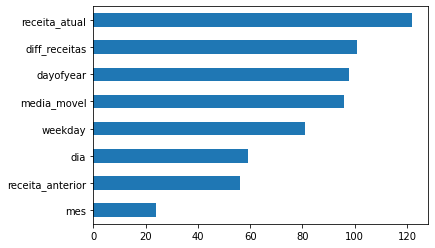

In [ ]:
lgbm = LGBMRegressor(random_state=30)

lgbm.fit(X_train, y_train)
pd.Series(lgbm.feature_importances_, index=X_train.columns.tolist()).sort_values(ascending=True).plot(kind='barh');

**[RESPOSTA]** 

As duas features mais importantes para o modelo LGBM, são <font color='yellow'>"receita atual" e "diff receitas"</font>

## Shap Values

**(0.5 ponto) `Q22`** Execute as linhas de código abaixo e interprete o gráfico `shap values`.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap

In [ ]:
lgbm_model[-1]

LGBMRegressor(random_state=30)

In [ ]:
explainer = shap.TreeExplainer(lgbm_model[-1])

In [ ]:
shap_values = explainer.shap_values(X_test)

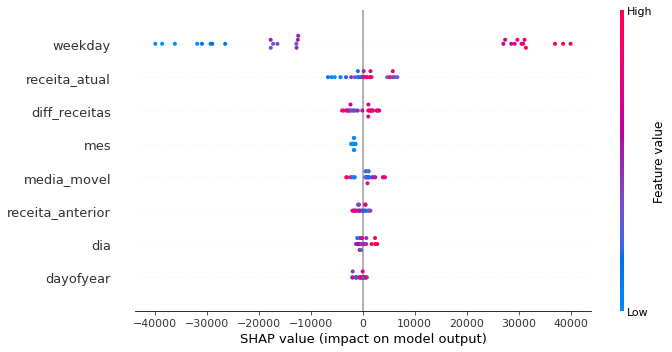

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type= 'dot', plot_size=(10,5))

As maiores receitas estão concentradas nos ultimos dias da semana, ou seja, no final de semana;

As demais features não demonstraram nenhum comportamento muito interessante, que dê para visualizar facilmente utilizando o gráfico Shap Value.